In [1]:
import os
os.chdir('/home/soham/Desktop/GitHub/BTP/')

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
import re

import warnings
warnings.filterwarnings('ignore')

## PCA with 112 & 121

In [2]:
all_data = pd.read_excel('data/mixture/8 solutions/total_new_data(8 mixtures).xlsx')

true_labels = all_data['Label']
labels = true_labels.map({'Mix_101': 0, 'A1': 1, 'A2': 2, 'A3': 3, 'Mix_111':4, 'Mix_121':5, 'Mix_211':6, 'Mix_112':7})

all_data = all_data.drop(['Dilution','Label'], axis=1)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(all_data)

pca_data = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_data.head(2)

,PC1,PC2
0,-187.890728,-7.931970
1,-202.043966,-42.657566


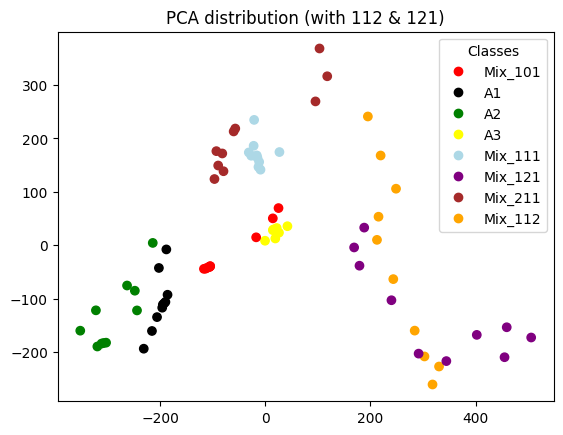

In [3]:
label_mapping = {0:'Mix_101', 1:'A1',2: 'A2',3: 'A3', 4:'Mix_111', 5:'Mix_121', 6:'Mix_211', 7:'Mix_112'}

colors = ['red', 'black', 'green', 'yellow', 'lightblue', 'purple', 'brown', 'orange']
scatter = plt.scatter(pca_data['PC1'], pca_data['PC2'], c=labels, cmap=ListedColormap(colors))
handles, labels = scatter.legend_elements()
labels = [label_mapping[int(re.search(r'\d+', str(label)).group())] for label in labels]

plt.title('PCA distribution (with 112 & 121)')
plt.legend(handles, labels, title="Classes")
plt.show()

In [4]:
pca_data['Labels'] = true_labels
pca_data.to_excel('data/mixture/8 solutions/PCA_with_112_121.xlsx', index=False)
pca_data.head()

,PC1,PC2,Labels
0,-187.890728,-7.931970,A1
1,-202.043966,-42.657566,A1
2,-185.621412,-92.832078,A1
3,-189.646498,-106.343482,A1
4,-192.093846,-108.870334,A1


## PCA without 112 & 121

In [5]:
all_data = pd.read_excel('data/mixture/8 solutions/total_new_data(8 mixtures).xlsx')

# Dropping the data of Mixture_112 & Mixture_121

all_data = all_data[all_data['Label']!='Mix_112'][all_data['Label']!='Mix_121']

true_labels = all_data['Label']
labels = true_labels.map({'Mix_101': 0, 'A1': 1, 'A2': 2, 'A3': 3, 'Mix_111':4, 'Mix_211':5})

all_data = all_data.drop(['Dilution','Label'], axis=1)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(all_data)

pca_data = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_data.head(2)

,PC1,PC2
0,-91.198957,81.747571
1,-125.743267,64.585973


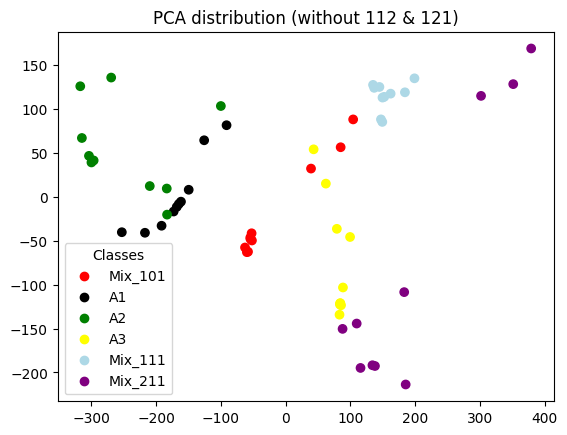

In [6]:
label_mapping = {0:'Mix_101', 1:'A1',2: 'A2',3: 'A3', 4:'Mix_111', 5:'Mix_211'}

colors = ['red', 'black', 'green', 'yellow', 'lightblue', 'purple']
scatter = plt.scatter(pca_data['PC1'], pca_data['PC2'], c=labels, cmap=ListedColormap(colors))
handles, labels = scatter.legend_elements()
labels = [label_mapping[int(re.search(r'\d+', str(label)).group())] for label in labels]

plt.title('PCA distribution (without 112 & 121)')
plt.legend(handles, labels, title="Classes")
plt.show()

In [7]:
pca_data['Labels'] = true_labels
pca_data.to_excel('data/mixture/8 solutions/PCA_without_112_121.xlsx', index=False)
pca_data.head()

,PC1,PC2,Labels
0,-91.198957,81.747571,A1
1,-125.743267,64.585973,A1
2,-149.612093,8.177297,A1
3,-161.555537,-5.390276,A1
4,-164.861610,-8.026516,A1
